# AIT511 Course Project I - Using Random Forest Classifier & XGBoost

### Overview:
Maintaining a healthy lifestyle is becoming increasingly difficult. The given dataset investigates how a person's weight category relates to their daily routines, eating habits, physical activity, and demographic information. We need to build models that can correctly categorize people into groups like inadequate weight, normal weight, overweight, or obesity levels.

### Objective:
The goal of this project is to build a machine learning model that can accurately predict a person's weight category based on their lifestyle, eating habits, physical activity, and demographic information and it is a multiclass classification problem.

#### 1. Importing Necessary Libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os, random

RANDOM_SEED = 42

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

#### 2. Loading the Dataset

In [377]:
train = pd.read_csv('train.csv') # This is the given competition train dataset
test = pd.read_csv('test.csv') # This is the given competition test dataset
original = pd.read_csv('ObesityDataSet.csv') # This is the original Obesity or CVD Risk dataset mentioned in the competition

#### 3. Merging the two datasets

In [378]:
original.rename(columns={'NObeyesdad': 'WeightCategory'}, inplace=True)
train = pd.concat([train, original], ignore_index=True)
train = train.drop(columns=['id'])
train.drop_duplicates(inplace=True) # Dropping duplicates from the dataset

#### 4. Exploratory Data Analysis & Visualization

In [379]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [380]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17620 entries, 0 to 17643
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          17620 non-null  object 
 1   Age                             17620 non-null  float64
 2   Height                          17620 non-null  float64
 3   Weight                          17620 non-null  float64
 4   family_history_with_overweight  17620 non-null  object 
 5   FAVC                            17620 non-null  object 
 6   FCVC                            17620 non-null  float64
 7   NCP                             17620 non-null  float64
 8   CAEC                            17620 non-null  object 
 9   SMOKE                           17620 non-null  object 
 10  CH2O                            17620 non-null  float64
 11  SCC                             17620 non-null  object 
 12  FAF                             17620

In [381]:
train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000,17620.000000
mean,23.879887,1.700245,87.675486,2.440376,2.753408,2.024916,0.981213,0.619643
std,5.753688,0.088343,26.349050,0.531381,0.713832,0.607826,0.838884,0.603121
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630927,66.000000,2.000000,3.000000,1.751700,0.015860,0.000000
50%,22.777890,1.700000,84.000000,2.348745,3.000000,2.000000,1.000000,0.579541
75%,26.000000,1.763215,111.275646,3.000000,3.000000,2.530035,1.592494,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [382]:
train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

Weight Category Distribution


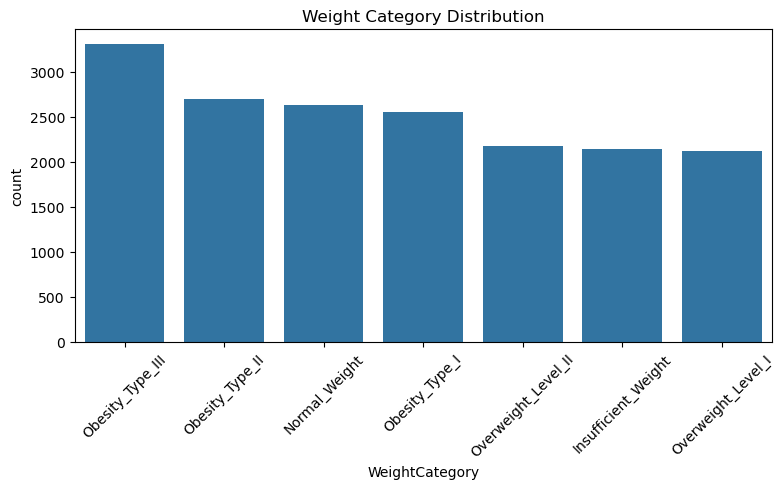

In [383]:
print("Weight Category Distribution")

plt.figure(figsize=(8, 5))
sns.countplot(x='WeightCategory', data=train,
              order=train['WeightCategory'].value_counts().index)
plt.title("Weight Category Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("weight_category_distribution.png", dpi=300)
plt.show()
plt.close()

Gender vs WeightCategory


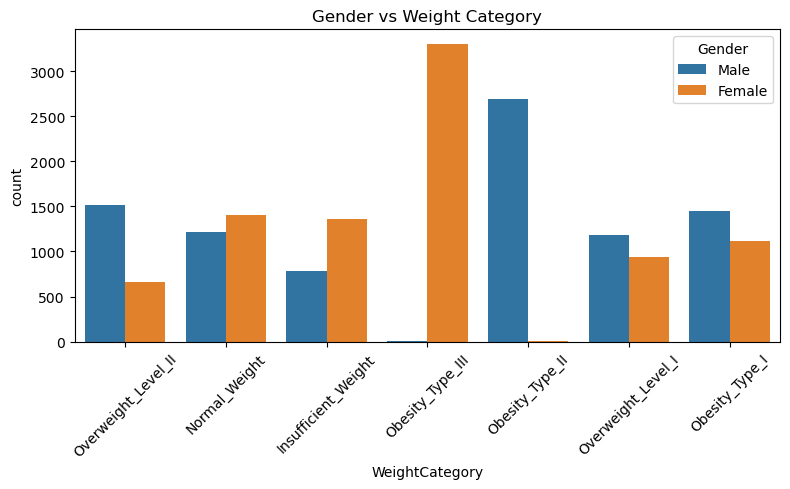

In [384]:
print("Gender vs WeightCategory")

plt.figure(figsize=(8, 5))
sns.countplot(x='WeightCategory', hue='Gender', data=train)
plt.title("Gender vs Weight Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("gender_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Age vs WeightCategory


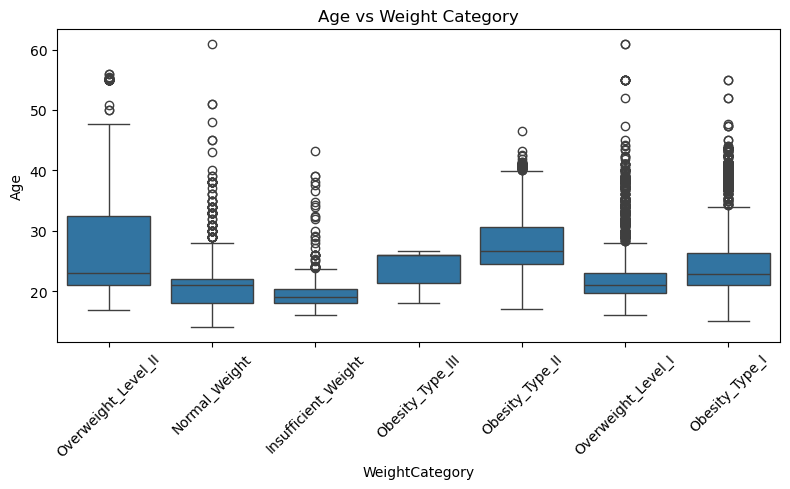

In [385]:
print("Age vs WeightCategory")

plt.figure(figsize=(8, 5))
sns.boxplot(x='WeightCategory', y='Age', data=train)
plt.title("Age vs Weight Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("age_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Weight vs Height


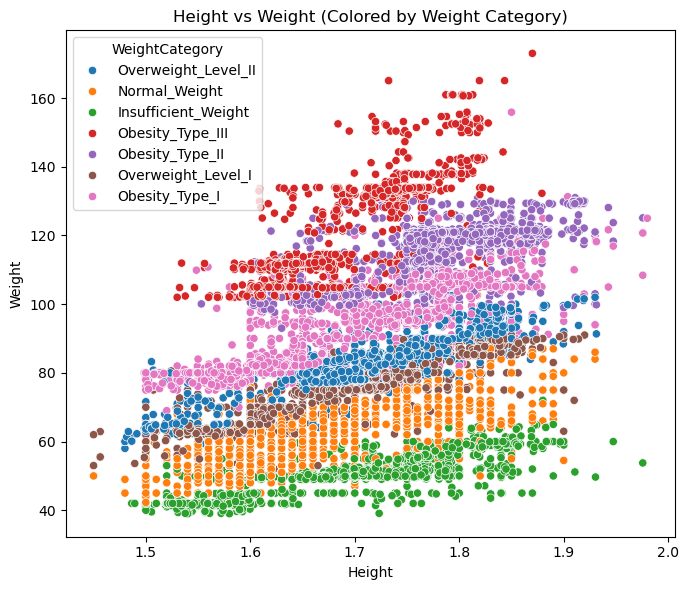

In [386]:
print("Weight vs Height")

plt.figure(figsize=(7, 6))
sns.scatterplot(x='Height', y='Weight', hue='WeightCategory', data=train)
plt.title("Height vs Weight (Colored by Weight Category)")
plt.tight_layout()
plt.savefig("height_vs_weight.png", dpi=300)
plt.show()
plt.close()

Family History vs WeightCategory


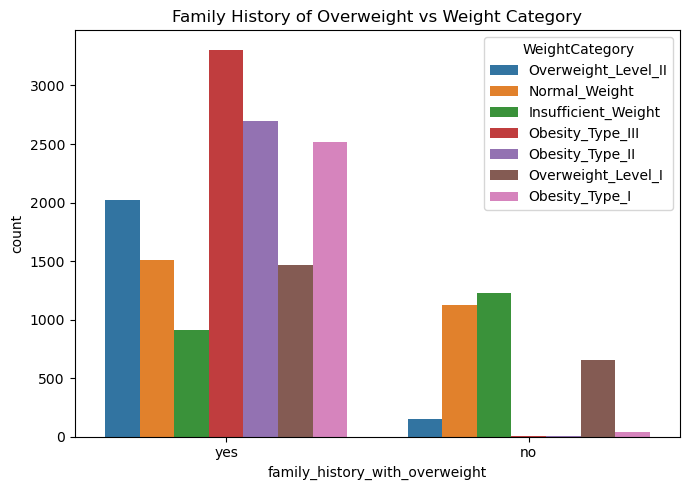

In [387]:
print("Family History vs WeightCategory")

plt.figure(figsize=(7, 5))
sns.countplot(x='family_history_with_overweight', hue='WeightCategory', data=train)
plt.title("Family History of Overweight vs Weight Category")
plt.tight_layout()
plt.savefig("family_history_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Physical Activity (FAF) vs WeightCategory


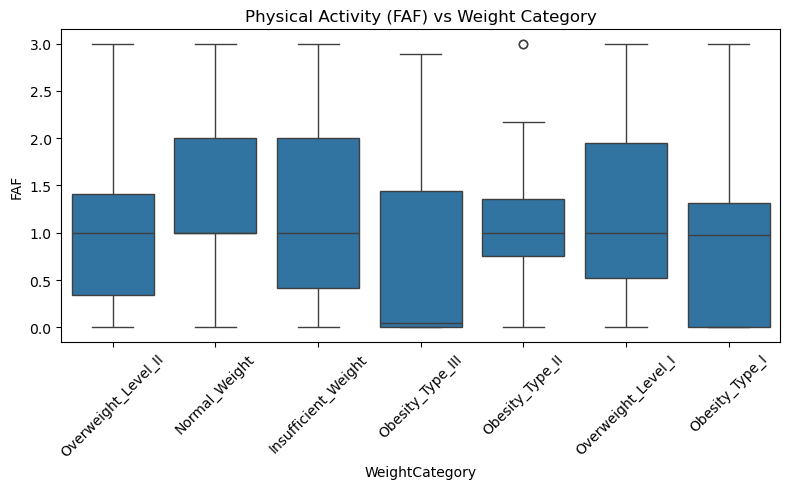

In [388]:
print("Physical Activity (FAF) vs WeightCategory")

plt.figure(figsize=(8, 5))
sns.boxplot(x='WeightCategory', y='FAF', data=train)
plt.title("Physical Activity (FAF) vs Weight Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("faf_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Food Habits — FAVC vs WeightCategory


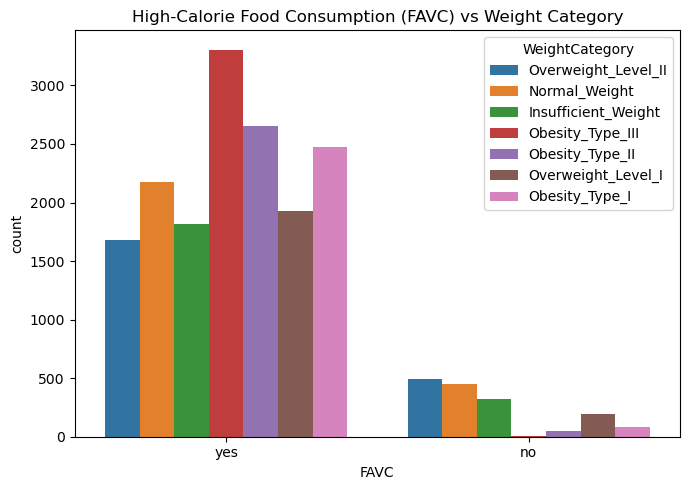

In [389]:
print("Food Habits — FAVC vs WeightCategory")

plt.figure(figsize=(7, 5))
sns.countplot(x='FAVC', hue='WeightCategory', data=train)
plt.title("High-Calorie Food Consumption (FAVC) vs Weight Category")
plt.tight_layout()
plt.savefig("favc_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Water Intake (CH2O) vs WeightCategory


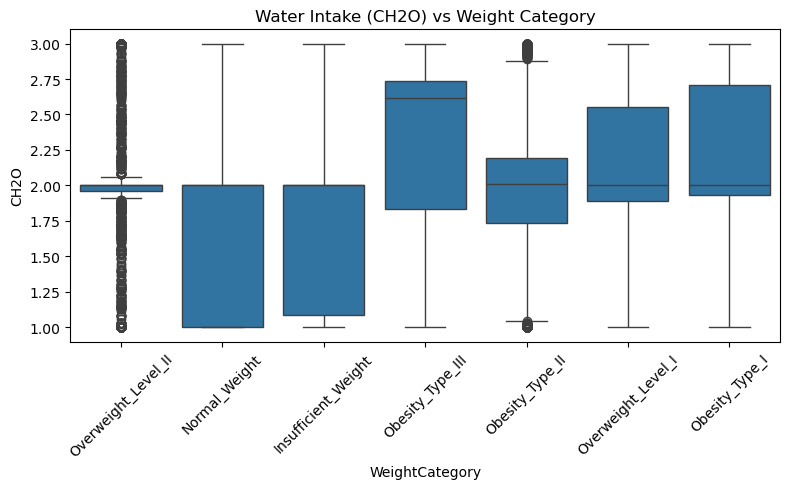

In [390]:
print("Water Intake (CH2O) vs WeightCategory")

plt.figure(figsize=(8, 5))
sns.boxplot(x='WeightCategory', y='CH2O', data=train)
plt.title("Water Intake (CH2O) vs Weight Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ch2o_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Lifestyle & Transport Influence — MTRANS vs WeightCategory


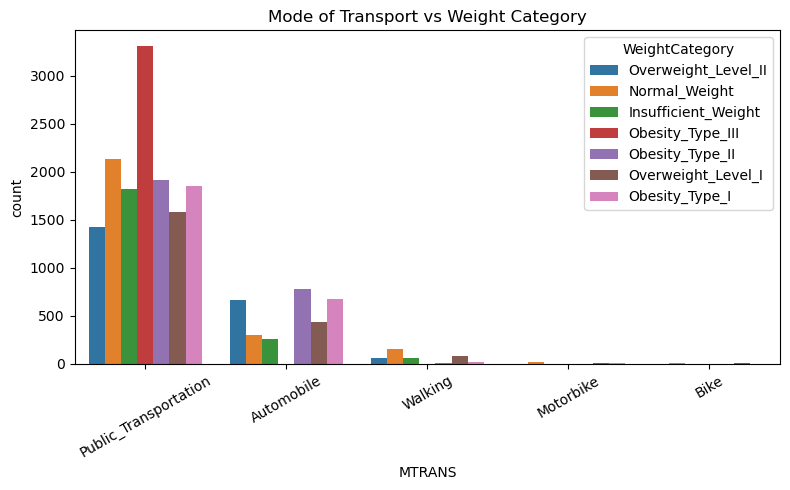

In [391]:
print("Lifestyle & Transport Influence — MTRANS vs WeightCategory")

plt.figure(figsize=(8, 5))
sns.countplot(x='MTRANS', hue='WeightCategory', data=train)
plt.title("Mode of Transport vs Weight Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("mtrans_vs_weight_category.png", dpi=300)
plt.show()
plt.close()

Correlation Heatmap (Numeric Features)


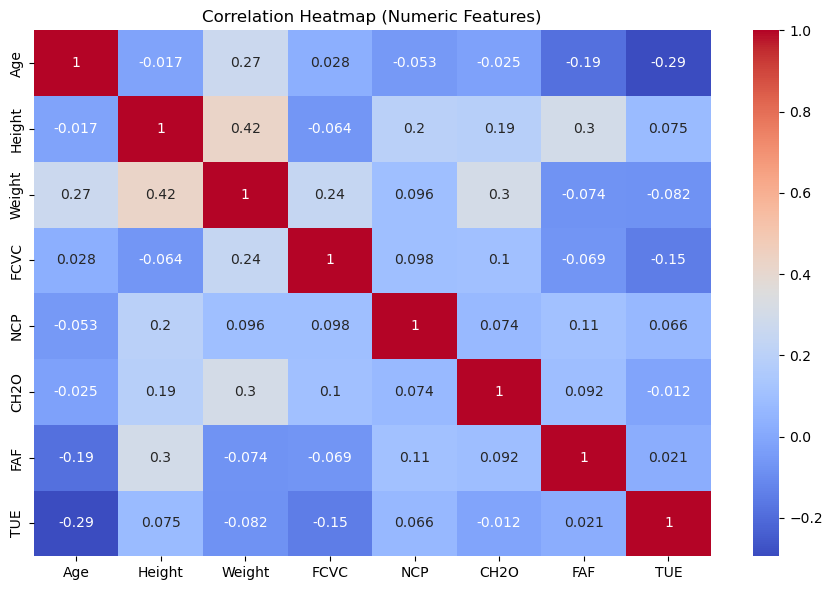

In [392]:
print("Correlation Heatmap (Numeric Features)")

plt.figure(figsize=(9, 6))
sns.heatmap(train.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()
plt.close()

Conclusion from Relationship Plots & Correlation Matrix:
1. The strongest positive correlation is between Weight and Height (0.42).
2. Moderate positive relationships are between Weight and CH2O (0.30) and Height and FAF (0.30).
3. The strongest negative correlation is between Age and TUE (-0.29).
4. 'Weight' and 'Height' show strong correlation with the target.
5. 'Age' also shows a relationship with 'Weight' and lower physical activity ('FAF') appears linked to higher weight categories.
6. 'family_history_with_overweight' is a strong indicator of 'WeightCategory'.
7. High Calorie Food Consumption (FAVC) is also linked to non-healthy weight categories.
8. 'MTRANS' also indicates that use different modes of transport specifically 'Public Transport' and 'Automobile' is majorly linked to non-healthy weight categories.

#### 5. Performing Feature Engineering

##### Body Mass Index (BMI) is a numerical value derived from a person’s weight and height, used to categorize individuals based on body fat and assess potential health risks related to underweight or overweight.

$\text{BMI} = \frac{\text{Weight}}{(\text{Height})^2}$

##### Category of BMI (kg/m²)
Underweight	: < 18.5

Normal weight :	18.5 – 24.9

Overweight : 25.0 - 29.9

Obese (Class I) : 30.0 – 34.9

Obese (Class II) : 35.0 – 39.9

Obese (Class III / Morbid Obesity) : ≥ 40

##### We will do a feature addition of BMI into our dataset

In [393]:
def bmi(train):
    train['BMI'] = train['Weight'] / (train['Height'] ** 2)
    return train
train = bmi(train)
test = bmi(test)
test_ids = test['id'].copy()

In [394]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


C:\Users\Swarnendu Sekhar Das\AppData\Local\Temp\ipykernel_21524\1539442702.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='WeightCategory', y='BMI', data=train, estimator='mean', ci='sd', palette='muted')
C:\Users\Swarnendu Sekhar Das\AppData\Local\Temp\ipykernel_21524\1539442702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WeightCategory', y='BMI', data=train, estimator='mean', ci='sd', palette='muted')


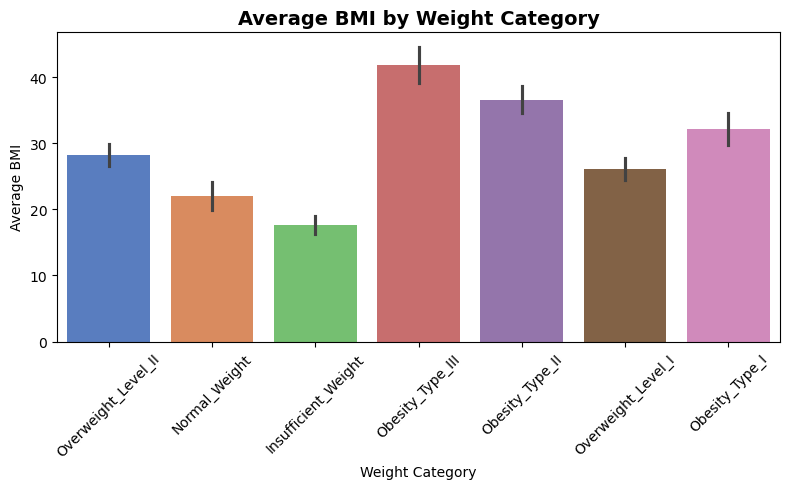

In [395]:
plt.figure(figsize=(8, 5))
sns.barplot(x='WeightCategory', y='BMI', data=train, estimator='mean', ci='sd', palette='muted')
plt.title("Average BMI by Weight Category", fontsize=14, fontweight='bold')
plt.xlabel("Weight Category")
plt.ylabel("Average BMI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bmi_vs_weightcategory.png", dpi=300)
plt.show()
plt.close()

From the bar plot, we can see that the average BMI increases steadily from normal weight to different levels of overweight and obesity. This means people in higher weight categories generally have higher BMI values. It clearly shows that BMI is a good indicator of a person’s weight status and helps the model separate the classes correctly.

#### 6. Data Preprocessing

In [396]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

labenc = LabelEncoder()
y = labenc.fit_transform(train['WeightCategory'])
X = train.drop(columns=['WeightCategory'])
X_test = test.drop(columns=['id'])

In [397]:
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(exclude='number').columns.tolist()

In [398]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

#### 7. Building Random Forest Classifier Model with Optuna Hyperparameter Tuning

In [399]:
!pip install optuna
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

optuna.logging.set_verbosity(optuna.logging.WARNING)

RUN_OPTUNA = False

In [400]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [300, 500]),
        'max_depth': trial.suggest_categorical('max_depth', [None, 20, 30]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 3]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt'])
    }

    rf_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(**params, random_state=RANDOM_SEED, n_jobs=-1))
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    score = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy', n_jobs=-1).mean()
    return score

if RUN_OPTUNA:
    sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
    print("Optuna Hyperparameter Tuning for Random Forest:")
    study_rf = optuna.create_study(direction='maximize', sampler=sampler)
    study_rf.optimize(objective_rf, n_trials=20)
    print("\nRandom Forest Tuning Complete.")
    print(f"Best Performing RF Hyperparameters found: {study_rf.best_params}")
    print(f"Best Performing RF CV Accuracy: {study_rf.best_value:.4f}")

# Best Parameters reported after Optuna Tuning
best_rf_params = {
    'n_estimators': 500, 
    'max_depth': 30, 
    'min_samples_split': 5, 
    'min_samples_leaf': 1, 
    'max_features': 'sqrt',
}
best_rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(**best_rf_params, random_state=RANDOM_SEED, n_jobs=-1))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
score = cross_val_score(best_rf_model, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"CV accuracy RF: {np.mean(score):.4f}")

best_rf_model.fit(X, y)

CV accuracy RF: 0.9083


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model',
                 RandomForestClassifier(max_depth=30, min_samples_split=5,
                                        n_estimators=500, n_jobs=-1,
                                        random_state=42))])

#### 8. Predicting on test dataset using Random Forest Classifier Model with best Hyperparameters

In [401]:
final_predictions_numeric_rf = best_rf_model.predict(X_test)
final_predictions_text_rf = labenc.inverse_transform(final_predictions_numeric_rf)

submission = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': final_predictions_text_rf
})

submission_filename = 'submission_rf_final.csv'
submission.to_csv(submission_filename, index=False)

print(submission.head())
print(f"\nTotal Predictions: {len(submission)}")

      id       WeightCategory
0  15533     Obesity_Type_III
1  15534   Overweight_Level_I
2  15535  Overweight_Level_II
3  15536      Obesity_Type_II
4  15537        Normal_Weight

Total Predictions: 5225


#### 9. Building XGBoost Classifier Model with Optuna Hyperparameter Tuning

In [402]:
!pip install xgboost

In [403]:
from xgboost import XGBClassifier

In [404]:
def objective_xgb(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 450, 850),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 5.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 5.0),
        "objective": "multi:softprob",
    }

    xgb_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(**params, random_state=RANDOM_SEED, seed=RANDOM_SEED, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    score = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy', n_jobs=-1).mean()
    return score

if RUN_OPTUNA:
    sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
    print("Optuna Hyperparameter Tuning for XGBoost:")
    study_xgb = optuna.create_study(direction='maximize', sampler=sampler)
    study_xgb.optimize(objective_xgb, n_trials=8)
    
    print("\nXGBoost Tuning Complete.")
    print(f"Best XGB Hyperparameters Found: {study_xgb.best_params}")
    print(f"Best XGB CV Accuracy: {study_xgb.best_value:.4f}")

# Best Parameters reported after Optuna Tuning
best_xgb_params = {
    'max_depth': 8, 
    'learning_rate': 0.023261762814078924, 
    'n_estimators': 676, 
    'min_child_weight': 11, 
    'subsample': 0.8189039990345469, 
    'colsample_bytree': 0.6288778293908555, 
    'gamma': 0.3034531022250151, 
    'reg_lambda': 1.8286993180835398, 
    'reg_alpha': 0.7419691882857313,        
    'objective': 'multi:softprob', 
}
best_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(**best_xgb_params, random_state=RANDOM_SEED, seed=RANDOM_SEED, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
score = cross_val_score(best_xgb_model, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(f"CV accuracy XGB: {np.mean(score):.4f}")

best_xgb_model.fit(X, y)

CV accuracy XGB: 0.9136


C:\Users\Swarnendu Sekhar Das\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:21:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(...
                               gamma=0.3034531022250151, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.023261762814078924, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=11,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=676, n_jobs=-1,
                               num_parallel_tree=None, ...))])

#### 10. Predicting on test dataset using XGBoost Classifier Model with best Hyperparameters

In [405]:
final_predictions_numeric_xgb = best_xgb_model.predict(X_test)
final_predictions_text_xgb = labenc.inverse_transform(final_predictions_numeric_xgb)

submission_xgb = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': final_predictions_text_xgb
})
submission_filename_xgb = 'submission_xgb_final.csv'
submission_xgb.to_csv(submission_filename_xgb, index=False)

print(submission_xgb.head())
print(f"\nTotal Predictions: {len(submission_xgb)}")

      id       WeightCategory
0  15533     Obesity_Type_III
1  15534   Overweight_Level_I
2  15535  Overweight_Level_II
3  15536      Obesity_Type_II
4  15537        Normal_Weight

Total Predictions: 5225


#### 11. Feature Importance

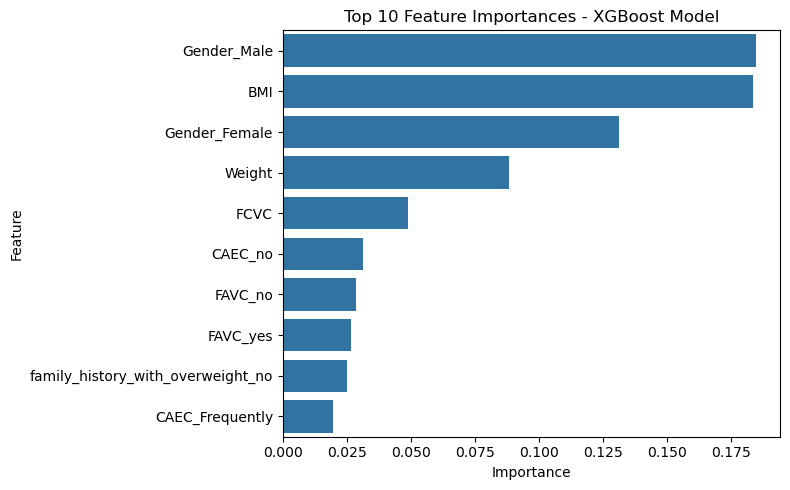

In [406]:
preprocessor_fitted = best_xgb_model.named_steps['preprocessor']
xgb_fitted = best_xgb_model.named_steps['model']

numeric_features_fitted = numeric_features
categorical_features_fitted = preprocessor_fitted.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(numeric_features_fitted) + list(categorical_features_fitted)

importances = xgb_fitted.feature_importances_

feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances - XGBoost Model')
plt.tight_layout()
plt.savefig("xgb_feature_importance.png", dpi=300)
plt.show()
plt.close()

#### 12. Confusion Matrix

C:\Users\Swarnendu Sekhar Das\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:21:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


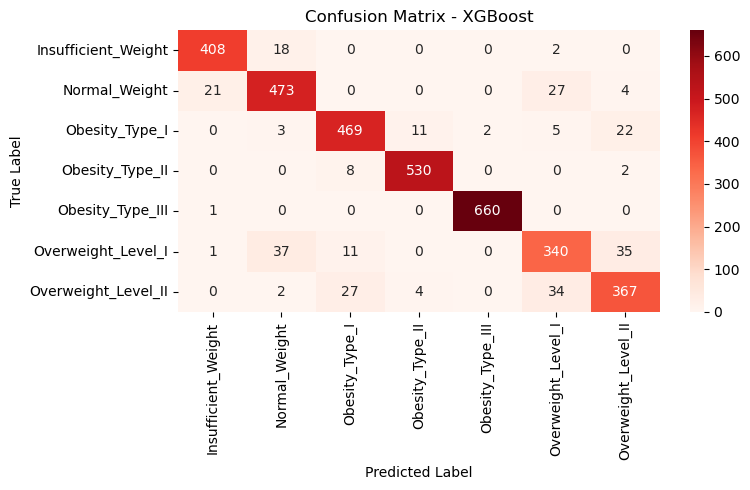

In [407]:
from sklearn.metrics import confusion_matrix

X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

best_xgb_model.fit(X_train_eval, y_train_eval)

y_pred_eval = best_xgb_model.predict(X_test_eval)

cm = confusion_matrix(y_test_eval, y_pred_eval)

class_labels = labenc.classes_

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("xgb_confusion_matrix.png", dpi=300)
plt.show()
plt.close()

### Conclusion

In this project, we successfully developed and evaluated machine learning models for a multiclass classification task, where we predicted weight categories using a combined dataset of 17,620 entries.

#### Our Key Steps and Findings:

#### Data Preparation:
We augmented the initial train.csv dataset with ObesityDataSet.csv and subsequently cleaned the data of duplicates to create the final training set.

#### Feature Engineering:
We added a significant feature, Body Mass Index (BMI), by calculating Weight / (Height^2). This provided a strong metric for our models.

#### Exploratory Data Analysis (EDA):
Our analysis identified several strong indicators for WeightCategory, including 'family_history_with_overweight', 'Weight', 'Height', 'FAVC' (High-Calorie Food Consumption), and 'MTRANS' (Mode of Transport). We found the strongest positive correlation among numeric features was between 'Weight' and 'Height' (0.42) which was key behind adding 'BMI'.

#### Model Implementation and Performance:

#### Random Forest Classifier:
We performed Optuna Hyperparameter Tuning with 5-fold stratified cross-validation yielded a best CV accuracy of 90.83% and Kaggle accuracy of 90.68%. The optimal hyperparameters we found were: 'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'.

#### XGBoost Classifier:
We performed Optuna Hyperparameter Tuning with 5-fold stratified cross-validation yielded a best CV accuracy of 91.38% and Kaggle accuracy of 91.129%. The optimal hyperparameters for this model were: 'max_depth': 8, 'learning_rate': 0.023261762814078924, 'n_estimators': 676, 'min_child_weight': 11, 'subsample': 0.8189039990345469, 'colsample_bytree': 0.6288778293908555, 'gamma': 0.3034531022250151, 'reg_lambda': 1.8286993180835398, 'reg_alpha': 0.7419691882857313.

#### Summary:
Our tuned XGBoost Classifier (CV Accuracy: 0.9138) slightly outperformed the tuned Random Forest model (CV Accuracy: 0.9083). Both models showed high predictive accuracy for this classification problem. We concluded the project by using both of our optimized models to generate and submit predictions for all 5,225 entries in the provided test dataset.